# Project - Stock Market Analysis

This project gets data from Yahoo finance on technology stocks and then analyze the data. 

In [2]:
# Load the necessary packages
import numpy as np 
import pandas as pd
from pandas import Series, DataFrame

# plotting tools
import seaborn as sns
import matplotlib.pyplot as plt 
#setting plot 
sns.set_style('whitegrid')
%matplotlib inline

# get data from Yahoo Finance using pandas
import pandas_datareader as pdr

# For time selection
from datetime import datetime

# For division
from __future__ import division # two integers division will still be float number, eg. 5 / 2 = 2.5


# 1. Grab Data from Yahoo Finance using pandas_datareader

In [3]:
# set up start date and end date for the data
# For one years data, two ways:
# way 1: one years ago from now
# end = datetime.now()
# start = datetime(end.year - 1,end.month,end.day)

# way 2, explicitely assign the year, month ,day for start and end time 
start = datetime(2016, 11, 1)
end = datetime(2017, 11, 1)

# Grab data for several companies: apple, facebook, amazon, google
# one could search stock names for companies in the following website or by google 'compnay name + stock name': 
# http://stocks.tradingcharts.com/stocks/symbols/s/all/microsoft

comp_list = ['AAPL', 'FB', 'AMZN', 'GOOGL']


# loop for finance data and setting as dataframe
for stock in comp_list:
    globals()[stock] = pdr.get_data_yahoo(stock, start, end) # the dataframe name is the stock name 

In [4]:
# check the data by "stock name.head()"
GOOGL.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-11-01,810.869995,813.960022,798.260010,805.479980,805.479980,2355900
2016-11-02,806.760010,806.760010,785.000000,788.419983,788.419983,2350700
2016-11-03,784.500000,790.000000,778.630005,782.190002,782.190002,2175200
2016-11-04,771.299988,788.479980,771.000000,781.099976,781.099976,1970600
2016-11-07,794.950012,805.000000,792.900024,802.030029,802.030029,1992600


# 2. Stock trend for unit price, volume and total value
Now, we have Apple, Facebook, Amazon, Google stock data for one years: 2016/11/1 - 2017/11/1
<br> We could first look at the trend of them 
<br> Calculate the daily average stock price, put them in one dataframe and plot it out. 

In [5]:
# calculate the daily mean stock price using high and low 
def dailymean(high, low):
    return (high + low)/2.0

AAPL_dmean = AAPL.apply(lambda x: dailymean(x['High'], x['Low']), axis=1)
FB_dmean = FB.apply(lambda x: dailymean(x['High'], x['Low']), axis=1)
AMZN_dmean = AMZN.apply(lambda x: dailymean(x['High'], x['Low']), axis=1)
GOOGL_dmean = GOOGL.apply(lambda x: dailymean(x['High'], x['Low']), axis=1)

In [6]:
df_dmean = DataFrame({'AAPL': AAPL_dmean.values, 'FB': FB_dmean.values, 
                     'AMZN': AMZN_dmean.values, 'GOOGL': GOOGL_dmean.values}, index = AAPL_dmean.index)
df_dmean.head()

,AAPL,AMZN,FB,GOOGL
Date,,,,
2016-11-01,112.149998,788.775024,130.294998,806.110016
2016-11-02,111.790000,774.149994,128.254998,795.880005
2016-11-03,110.505001,770.500000,121.390000,784.315002
2016-11-04,109.180001,759.614990,120.590000,779.739990
2016-11-07,109.985000,779.334991,122.279999,798.950012


# 2.1. How does the unit stock price change over the last year?
Now we have a dataframe that includes the daily stock price for AAPL, AMZN, FB and GOOGL.
<br> We could check their trend over the past the year. 
<br> From the following plot, we could see all the four stocks show a increasing trend. 
<br> This upward trend is larger for AAPL/AMZN, compared to FB/GOOGL

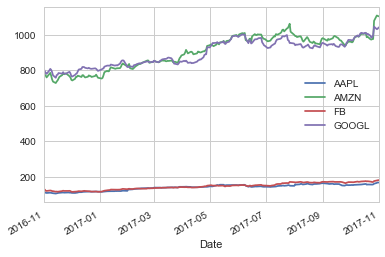

In [7]:
df_dmean.plot()

# 2.2. How does the volume change for the four stock over last year?
<br> As 'Volume' is a existing variable in the data source, we could directly grab it and build a dataframe. 

In [8]:
df_volume = pdr.get_data_yahoo(comp_list, start, end)['Volume'] # Grap 'Volume' for the four companies and build a dataframe as df_volume

In [9]:
df_volume.head() # check the data 

,AAPL,AMZN,FB,GOOGL
Date,,,,
2017-11-01,23354878.0,2460317.0,17207168.0,1295713.0
2017-10-31,35654100.0,3453100.0,19918300.0,1501300.0
2017-10-30,44700800.0,6613100.0,24353200.0,2340200.0
2017-10-27,44454200.0,16565000.0,30285300.0,5184100.0
2017-10-26,17000500.0,5618700.0,11833100.0,2369800.0


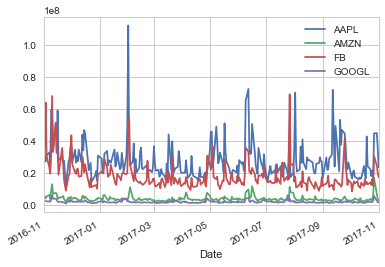

In [10]:
df_volume.plot()

# 2.3. How does the total stock worths change over the last year?
Total stock worths = unit stock price * volume
<br> While in the unit stock price change figure, we see the trend and price of FB is very close to GOOGLE. And it seems that the two companies do not distinguish from each other. 
<br> However, if we use the unit stock price multiply the total volume, we see the total stock worths for the two companies differ a lot. FB increases rapidly for the last year. This indicates FB stock grows well over the past year. 

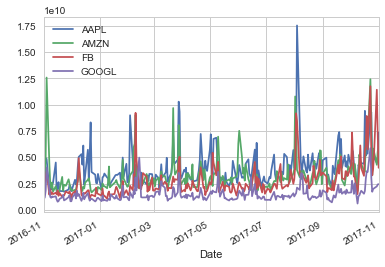

In [11]:
df_total = DataFrame(df_dmean.values * df_volume.values, index=df_dmean.index, columns=df_dmean.columns)
df_total.plot()

# 3. Correlation Analysis on Stock Price 
We could analyze the correlation relationships between any two of the four stocks. 

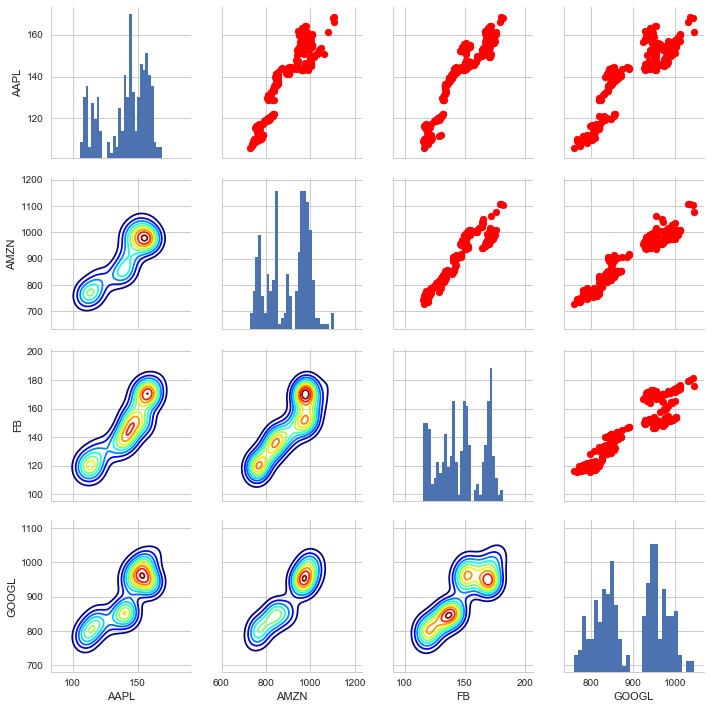

In [29]:
# About how to use sns.PairGrid, one could refer to the following website. 
'''
import webbrowser  
url = 'http://seaborn.pydata.org/generated/seaborn.PairGrid.html'
webbrowser.open(url) # open the website for pairplot documentation 

url = 'https://matplotlib.org/users/colormaps.html'
webbrowser.open(url) # open the website for color map styles in python
'''

pairplot_dmean = sns.PairGrid(df_dmean) # set up the plot
pairplot_dmean.map_upper(plt.scatter,color='red') # specify upper triangle 
pairplot_dmean.map_lower(sns.kdeplot,cmap='jet') # specify the lower triangle as kdeplot and color (BluePurple)
pairplot_dmean.map_diag(plt.hist,bins=30) # define the triangle plot as histogram

/Users/hefei/anaconda2/lib/python2.7/site-packages/seaborn/linearmodels.py:1290: UserWarning: The `corrplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `corrplot` function has been deprecated in favor "
/Users/hefei/anaconda2/lib/python2.7/site-packages/seaborn/linearmodels.py:1356: UserWarning: The `symmatplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `symmatplot` function has been deprecated in favor "


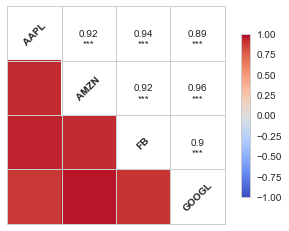

In [36]:
sns.linearmodels.corrplot(df_dmean.dropna(), annot=True) # the pairwise correlation coefficients